In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# ЛР3. Классификация с помощью метода ближайших соседей.

## Задание 1.

Для каждого из подзаданий: 

0. Проведите предварительную обработку данных.
1. Постройте модель классификации на основе метода ближайших соседей используя функции библиотеки sklearn.
2. Подберите оптимальные гиперпараметры модели используя кросс-валидацию.
3. Сделайте выводы о точности моделей.
4. Постройте несколько валиадционных кривых.


### 1.1 Скоринг отказа от услуг оператора связи.

Используйте данные из файла telecom.csv для предсказания отказа от услуг связи. Столбец "churn". 
Предврительно изучите и подготовьте данные.

In [5]:
telecom_df = pd.read_csv("telecom.csv")

In [6]:
pd.set_option('display.max_columns', 100)

In [7]:
telecom_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
target = "churn"

In [9]:
y = telecom_df[target].astype(int)
X = telecom_df[telecom_df.columns[~telecom_df.columns.isin([target, "phone number", "state"])]]

In [10]:
# from previous LR
columns_to_delete = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

In [11]:
X.drop(columns=columns_to_delete, inplace=True)

In [12]:
X.shape, y.shape

((3333, 14), (3333,))

In [13]:
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3


In [14]:
X["international plan"] = (X["international plan"] == "yes").astype(int)

In [15]:
X["voice mail plan"] = (X["voice mail plan"] == "yes").astype(int)

In [16]:
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
0,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2833, 14), (500, 14), (2833,), (500,))

In [19]:
neig_classifier = KNeighborsClassifier() # with default parameters

In [20]:
neig_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
neig_classifier.score(X_train, y_train)

0.875750088245676

In [22]:
neig_classifier.score(X_test, y_test)

0.852

In [23]:
cross_val_score(neig_classifier, X, y, cv=5).mean()

0.85238461850156

In [24]:
params = {
    "n_neighbors": range(2, 6),
    "weights": ["distance"],
    "p": [2, 3]
}

In [25]:
neig_gridsearch = GridSearchCV(neig_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=1)

In [26]:
model = neig_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [27]:
model.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [28]:
model.best_score_

0.8485663182954113

In [29]:
model.best_estimator_.score(X_test, y_test)

0.852

In [30]:
params = {
    "n_neighbors": range(6, 10),
    "weights": ["distance"],
    "p": [1, 3]
}

In [31]:
neig_gridsearch = GridSearchCV(neig_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=1)

In [32]:
model = neig_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [33]:
model.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [34]:
model.best_score_

0.8570431444400819

In [35]:
model.best_estimator_.score(X_test, y_test)

0.856

    Normalize the data

In [36]:
X_train.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
88,74,415,0,1,35,104,26.20,84,10.49,57,9.09,9,2.94,2
278,131,415,0,1,25,85,32.76,105,19.20,59,11.44,6,2.94,2
1437,126,415,1,1,34,118,41.63,105,18.67,136,9.49,6,2.62,4
166,185,510,0,1,31,126,32.27,133,13.88,126,11.92,3,2.03,1
2560,61,415,0,0,0,67,33.54,106,22.48,116,9.47,6,2.43,1


In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler().fit(X_train)

In [39]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [41]:
X_train_scaled.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
count,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000
mean,0.412616,0.283362,0.096717,0.276032,0.158939,0.522435,0.508246,0.588111,0.551999,0.470235,0.477358,0.234733,0.512141,0.174099
std,0.164370,0.413904,0.295625,0.447112,0.268956,0.146848,0.155630,0.117866,0.138954,0.137428,0.135870,0.128737,0.138976,0.147306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,0.000000,0.000000,0.000000,0.000000,0.429630,0.403716,0.511765,0.456487,0.373239,0.387328,0.157895,0.425926,0.111111
50%,0.409091,0.068627,0.000000,0.000000,0.000000,0.525926,0.506926,0.588235,0.553543,0.471831,0.478183,0.210526,0.514815,0.111111
75%,0.520661,0.068627,0.000000,1.000000,0.392157,0.622222,0.614020,0.664706,0.643805,0.563380,0.570831,0.315789,0.600000,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X_test_scaled.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.418446,0.301627,0.098000,0.280000,0.158039,0.517837,0.512092,0.593424,0.556582,0.485930,0.482591,0.241579,0.510933,0.171111
std,0.165669,0.423896,0.297612,0.449449,0.265490,0.158633,0.160877,0.113307,0.142363,0.139322,0.137022,0.133966,0.143140,0.139645
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.222222,-0.007432,0.282353,0.085733,0.091549,0.055589,0.000000,0.000000,0.000000
25%,0.305785,0.068627,0.000000,0.000000,0.000000,0.420370,0.415160,0.517647,0.461501,0.394366,0.386282,0.157895,0.414815,0.111111
50%,0.421488,0.068627,0.000000,0.000000,0.000000,0.518519,0.517230,0.594118,0.555807,0.485915,0.484160,0.210526,0.514815,0.111111
75%,0.521694,1.000000,0.000000,1.000000,0.392157,0.622222,0.613260,0.670588,0.660709,0.570423,0.571279,0.315789,0.609259,0.222222
max,0.925620,1.000000,1.000000,1.000000,0.901961,0.948148,0.956081,0.964706,0.909091,0.936620,0.927077,1.052632,0.944444,0.777778


In [43]:
neig_classifier = KNeighborsClassifier() # with default parameters

In [44]:
neig_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [45]:
neig_classifier.score(X_train_scaled, y_train)

0.9170490645958348

In [46]:
neig_classifier.score(X_test_scaled, y_test)

0.882

In [47]:
cross_val_score(neig_classifier, pd.concat([X_train_scaled, X_test_scaled]), pd.concat([y_train, y_test]), cv=5).mean()

0.8841903372638005

In [48]:
params = {
    "n_neighbors": range(2, 6),
    "weights": ["distance"],
    "p": [2, 3]
}

In [49]:
neig_gridsearch = GridSearchCV(neig_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=1)

In [50]:
model = neig_gridsearch.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [51]:
model.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [52]:
model.best_score_

0.8824549267423236

In [53]:
model.best_estimator_.score(X_test_scaled, y_test)

0.89

In [54]:
neig_classifier = KNeighborsClassifier(**{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}) # with default parameters

In [55]:
neig_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, p=3, weights='distance')

In [56]:
neig_classifier.score(X_train_scaled, y_train)

1.0

In [57]:
neig_classifier.score(X_test_scaled, y_test)

0.89

In [58]:
cross_val_score(neig_classifier, pd.concat([X_train_scaled, X_test_scaled]), pd.concat([y_train, y_test]), cv=5).mean()

0.8796885341113228

    С преобработованными параметрами результаты намного лучше, чем без 0.856 vs 0.879 при GridSearch-е

In [59]:
from typing import Iterable

In [121]:
def plot_validation_curve(estimator, parameter: str, paramerter_range: Iterable, X_train, y_train, X_test, y_test, cv=5):
    from sklearn.model_selection import cross_val_score

    cv_scores = []
    test_scores = []
    
    for value in paramerter_range:
        est = estimator(**{parameter: value})
        cv_scores.append(cross_val_score(est, X_train, y_train, cv=cv).mean())
        est.fit(X_train, y_train)
        test_scores.append(est.score(X_test, y_test))
    
    plt.plot(paramerter_range, cv_scores, label="CV")
    plt.plot(paramerter_range, test_scores, label="test")
    plt.legend()

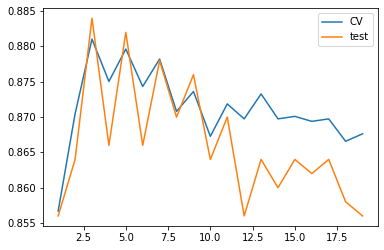

In [61]:
plot_validation_curve(KNeighborsClassifier, "n_neighbors", range(1, 20), X_train_scaled, y_train, X_test_scaled, y_test)

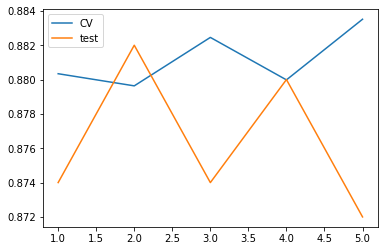

In [62]:
plot_validation_curve(KNeighborsClassifier, "p", range(1, 6), X_train_scaled, y_train, X_test_scaled, y_test)

### 1.2 Классификация ириса из датасет iris. 

Предскажите вид ириса по его параметрам.

In [63]:
iris = sns.load_dataset('iris')

In [64]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
target = "species"

In [66]:
y = iris[target]
X = iris[iris.columns[~iris.columns.isin([target])]]

In [67]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=True, shuffle=True)

In [69]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((127, 4), (127,), (23, 4), (23,))

In [70]:
neig_classifier = KNeighborsClassifier() # with default parameters

In [71]:
neig_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
neig_classifier.score(X_test, y_test)

1.0

In [73]:
cross_val_score(neig_classifier, X, y, cv=5).mean()

0.9733333333333334

In [74]:
params = {
    "n_neighbors": range(2, 6),
    "weights": ["distance"],
    "p": [2, 3]
}

In [75]:
neig_gridsearch = GridSearchCV(neig_classifier, param_grid=params, n_jobs=6, cv=5, verbose=False)

In [76]:
model = neig_gridsearch.fit(X_train, y_train)

In [77]:
model.best_params_

{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

In [78]:
model.best_score_

0.9603076923076923

In [79]:
model.best_estimator_.score(X_test, y_test)

1.0

    Normalize the data

In [80]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
40,5.0,3.5,1.3,0.3
125,7.2,3.2,6.0,1.8
99,5.7,2.8,4.1,1.3
33,5.5,4.2,1.4,0.2
19,5.1,3.8,1.5,0.3


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler().fit(X_train)

In [83]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [85]:
X_train_scaled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02
mean,-3.129605e-16,-1.736144e-15,1.188900e-16,2.517671e-16
std,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00
min,-1.869262e+00,-2.392758e+00,-1.575126e+00,-1.437724e+00
25%,-8.973222e-01,-5.384162e-01,-1.264504e+00,-1.177993e+00
50%,-4.687504e-02,-7.483073e-02,2.886101e-01,1.206625e-01
75%,6.820796e-01,6.205475e-01,7.404250e-01,7.699902e-01
max,2.261481e+00,3.170268e+00,1.757009e+00,1.679049e+00


In [86]:
X_test_scaled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,23.000000,23.000000,23.000000,23.000000
mean,0.037641,0.378677,-0.114094,-0.065666
std,1.039604,1.006676,0.973499,0.927282
min,-1.747769,-1.233794,-1.462173,-1.307858
25%,-0.532845,-0.074831,-1.208027,-1.048127
50%,-0.289860,0.388755,0.345087,0.120662
75%,0.803572,0.736444,0.458041,0.445326
max,2.504466,2.243097,1.474624,1.419318


In [87]:
neig_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [88]:
neig_classifier.score(X_test_scaled, y_test)

0.9565217391304348

In [89]:
cross_val_score(neig_classifier, pd.concat([X_train_scaled, X_test_scaled]), pd.concat([y_train, y_test]), cv=5).mean()

0.9533333333333334

In [90]:
params = {
    "n_neighbors": range(2, 6),
    "weights": ["distance"],
    "p": [2, 3]
}

In [91]:
neig_gridsearch = GridSearchCV(neig_classifier, param_grid=params, n_jobs=6, cv=5, verbose=False)

In [92]:
model = neig_gridsearch.fit(X_train_scaled, y_train)

In [93]:
model.best_params_

{'n_neighbors': 4, 'p': 3, 'weights': 'distance'}

In [94]:
model.best_score_

0.9363076923076923

In [95]:
model.best_estimator_.score(X_test_scaled, y_test)

1.0

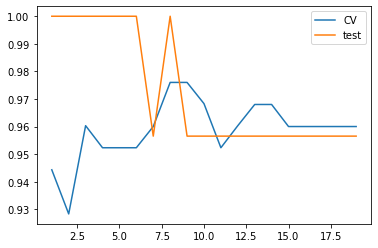

In [96]:
plot_validation_curve(KNeighborsClassifier, "n_neighbors", range(1, 20), X_train, y_train, X_test, y_test)

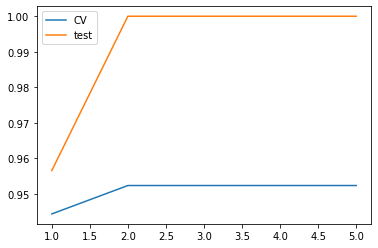

In [97]:
plot_validation_curve(KNeighborsClassifier, "p", range(1, 6), X_train, y_train, X_test, y_test)

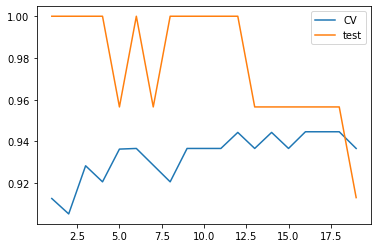

In [98]:
plot_validation_curve(KNeighborsClassifier, "n_neighbors", range(1, 20), X_train_scaled, y_train, X_test_scaled, y_test)

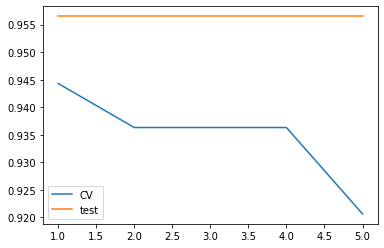

In [99]:
plot_validation_curve(KNeighborsClassifier, "p", range(1, 6), X_train_scaled, y_train, X_test_scaled, y_test)

        KNeighborsClassifier отлично справляется с данной задачей,на тестовых данных показывает идеальный результат.

### 1.3 Предсказание диабета у пациентов.

Используйте данные из файла diabetes.csv для предсказания исхода для пациентов. Столбец "outcome". Предварительно изучите и подготовьте данные. 

In [101]:
df_diabetes = pd.read_csv("../data/diabetes.csv")

In [102]:
target = "Outcome"

In [103]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
y = df_diabetes[target]
X = df_diabetes[df_diabetes.columns[~df_diabetes.columns.isin([target])]]

In [105]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True)

In [107]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((652, 8), (116, 8), (652,), (116,))

In [108]:
scaler = MinMaxScaler().fit(X_train)

In [118]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [110]:
neig_classifier = KNeighborsClassifier() # with default parameters

In [111]:
neig_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
neig_classifier.score(X_train, y_train)

0.7929447852760736

In [113]:
neig_classifier.score(X_test, y_test)

0.6724137931034483

In [114]:
neig_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [115]:
neig_classifier.score(X_train_scaled, y_train)

0.8404907975460123

In [116]:
neig_classifier.score(X_test_scaled, y_test)

0.6724137931034483

In [119]:
cross_val_score(neig_classifier, X, y, cv=5).mean()

0.723979288685171

In [120]:
cross_val_score(neig_classifier, pd.concat([X_train_scaled, X_test_scaled]), pd.concat([y_train, y_test]), cv=5).mean()

0.7239453357100416

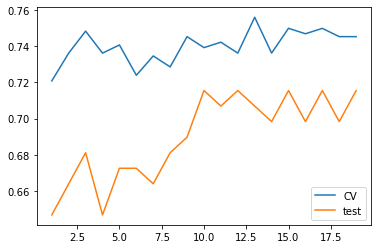

In [131]:
plot_validation_curve(KNeighborsClassifier, "n_neighbors", range(1, 20), X_train_scaled, y_train, X_test_scaled, y_test)

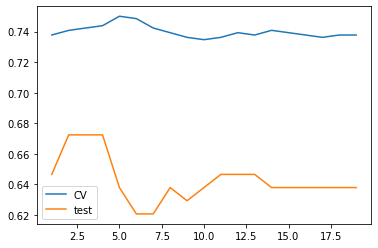

In [132]:
plot_validation_curve(KNeighborsClassifier, "p", range(1, 20), X_train_scaled, y_train, X_test_scaled, y_test)

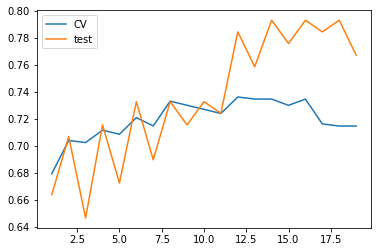

In [133]:
plot_validation_curve(KNeighborsClassifier, "n_neighbors", range(1, 20), X_train, y_train, X_test, y_test)

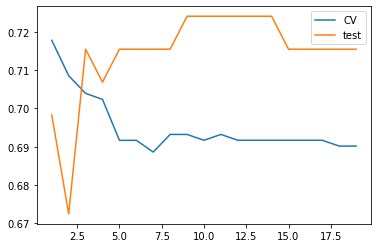

In [135]:
plot_validation_curve(KNeighborsClassifier, "p", range(1, 20), X_train, y_train, X_test, y_test)

In [157]:
params = {
    "n_neighbors": range(2, 12),
    "weights": ["distance", "uniform"],
    "p": range(2, 6)
}

In [158]:
neig_gridsearch = GridSearchCV(neig_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=1)

In [159]:
model = neig_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [160]:
model.best_params_

{'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}

In [161]:
model.best_score_

0.7331297709923664

In [162]:
model.best_estimator_.score(X_test, y_test)

0.7327586206896551

In [149]:
params = {
    "n_neighbors": range(10, 20),
    "weights": ["uniform", "distance"],
    "p": range(2, 6)
}

In [150]:
neig_gridsearch = GridSearchCV(neig_classifier, param_grid=params, n_jobs=-1, cv=5, verbose=1)

In [151]:
model = neig_gridsearch.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [152]:
model.best_params_

{'n_neighbors': 11, 'p': 5, 'weights': 'distance'}

In [153]:
model.best_score_

0.757709923664122

In [154]:
model.best_estimator_.score(X_test_scaled, y_test)

0.6637931034482759

    Лучший результат показала модель с GridSearch и без предобработанных данных

## Задание 2. 

Самостоятельно реализуйте класс для модели ближайших соседей. Постройте модель эстиматора для данных из задания 1.
Произведите подбор оптивальных параметров для моделей.

## Ссылки

Классификация. https://towardsdatascience.com/a-simple-introduction-to-k-nearest-neighbors-algorithm-b3519ed98e

Документация.   https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html